In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from prophet import Prophet


In [3]:
# checking numpy version
np.__version__

'1.20.3'

In [4]:

df = pd.read_csv('../data/Bike_Sharing_Demand.csv',parse_dates = True)

In [5]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
# me creo una fucnión para calcular las métricas
def timeseries_evaluation_metrics_func(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    #print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [8]:

df = df.rename(columns={'datetime': 'ds', 'count': 'y'})

In [9]:
# me quedo con los últimos 48 para validación
validate = df[['ds','y']].tail(48)

df.drop(df[['ds','y']].tail(48).index,inplace=True)

train = df[['ds','y']]


In [10]:
# le digo que no tiene yearly_seasonality
m = Prophet(yearly_seasonality=False)

In [11]:
# voy a predecir 2 días
m.fit(train)
p = 48
future = m.make_future_dataframe(periods=p,freq='H',include_history=False)


Initial log joint probability = -328.075
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       17972.1     0.0424795       1581.07           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       17981.3    0.00452669       280.329           1           1      246   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     226       17983.5   0.000146464       194.316   5.991e-07       0.001      334  LS failed, Hessian reset 
     299       17986.5    0.00155805       74.1566        0.63        0.63      422   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     349       17988.1   0.000115608       123.949   4.317e-07       0.001      545  LS failed, Hessian reset 
     399       17989.1   0.000365119       77.3366      0.3743           1      625   
    Iter      log pro

In [12]:
forecast = m.predict(future)

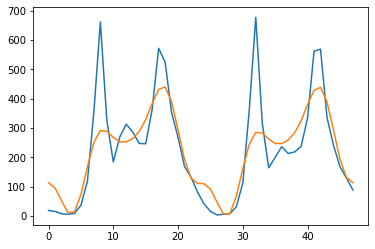

In [13]:
#forecast.yhat.plot()
# la predicción deja mucho que desear
plt.plot(list(validate.y))
plt.plot(list(forecast.yhat))

In [14]:
# el r^2 es casi del 70% un poco pobre
timeseries_evaluation_metrics_func(validate.y,forecast.yhat)

MSE is : 9943.703486287084
MAE is : 65.4473716863534
RMSE is : 99.71812015018676
MAPE is : 106.80556040942119
R2 is : 0.6998512345951966



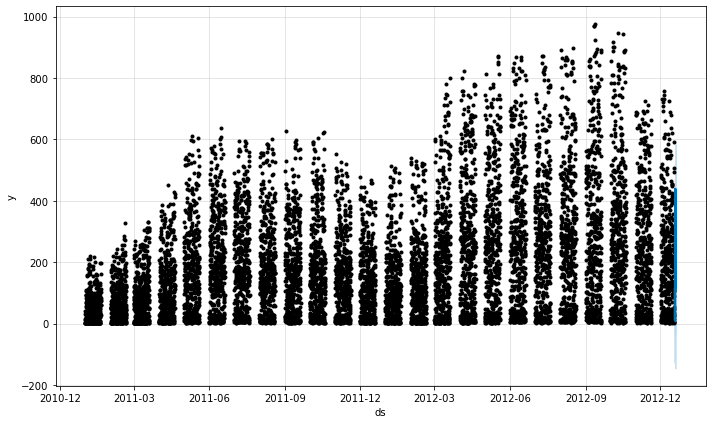

In [15]:
fig1 = m.plot(forecast)

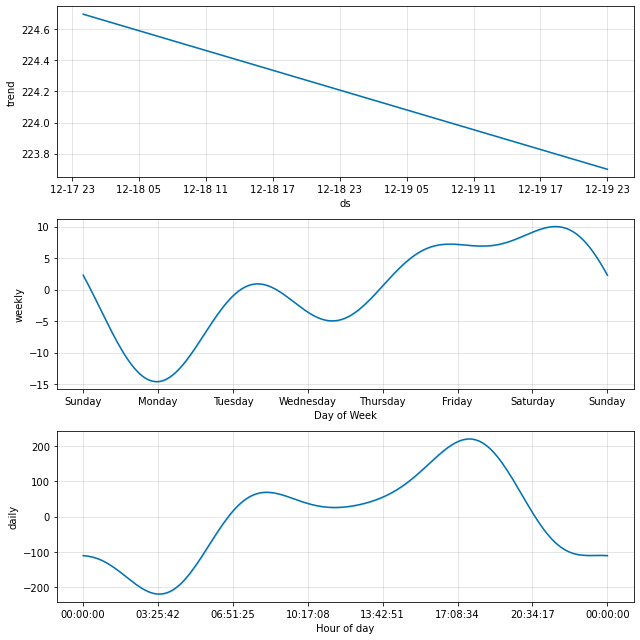

In [16]:
fig2 = m.plot_components(forecast)
# tendencia
# semanal
# la hora
# teóricamente si sumamos todo en la segunda y tercera, nos debería de dar 0, estamos por encima de la media
# semanal, diaría o por debajo?

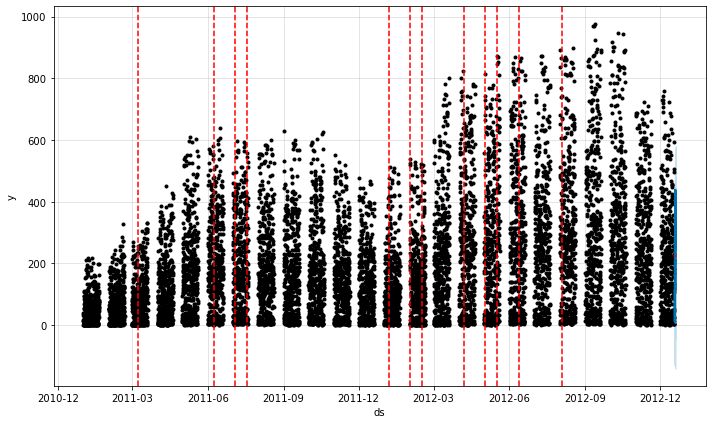

In [15]:
from prophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)